In [159]:
"""Import modules"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# Feature columns that are members of the same 'family'

chroma_col = ['Chroma_1', 'Chroma_10', 'Chroma_11', 'Chroma_12', 'Chroma_2',
       'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7',
       'Chroma_8', 'Chroma_9']

mel_col = ['MEL_1', 'MEL_10', 'MEL_100', 'MEL_101',
       'MEL_102', 'MEL_103', 'MEL_104', 'MEL_105', 'MEL_106', 'MEL_107',
       'MEL_108', 'MEL_109', 'MEL_11', 'MEL_110', 'MEL_111', 'MEL_112',
       'MEL_113', 'MEL_114', 'MEL_115', 'MEL_116', 'MEL_117', 'MEL_118',
       'MEL_119', 'MEL_12', 'MEL_120', 'MEL_121', 'MEL_122', 'MEL_123',
       'MEL_124', 'MEL_125', 'MEL_126', 'MEL_127', 'MEL_128', 'MEL_13',
       'MEL_14', 'MEL_15', 'MEL_16', 'MEL_17', 'MEL_18', 'MEL_19',
       'MEL_2', 'MEL_20', 'MEL_21', 'MEL_22', 'MEL_23', 'MEL_24',
       'MEL_25', 'MEL_26', 'MEL_27', 'MEL_28', 'MEL_29', 'MEL_3',
       'MEL_30', 'MEL_31', 'MEL_32', 'MEL_33', 'MEL_34', 'MEL_35',
       'MEL_36', 'MEL_37', 'MEL_38', 'MEL_39', 'MEL_4', 'MEL_40',
       'MEL_41', 'MEL_42', 'MEL_43', 'MEL_44', 'MEL_45', 'MEL_46',
       'MEL_47', 'MEL_48', 'MEL_49', 'MEL_5', 'MEL_50', 'MEL_51',
       'MEL_52', 'MEL_53', 'MEL_54', 'MEL_55', 'MEL_56', 'MEL_57',
       'MEL_58', 'MEL_59', 'MEL_6', 'MEL_60', 'MEL_61', 'MEL_62',
       'MEL_63', 'MEL_64', 'MEL_65', 'MEL_66', 'MEL_67', 'MEL_68',
       'MEL_69', 'MEL_7', 'MEL_70', 'MEL_71', 'MEL_72', 'MEL_73',
       'MEL_74', 'MEL_75', 'MEL_76', 'MEL_77', 'MEL_78', 'MEL_79',
       'MEL_8', 'MEL_80', 'MEL_81', 'MEL_82', 'MEL_83', 'MEL_84',
       'MEL_85', 'MEL_86', 'MEL_87', 'MEL_88', 'MEL_89', 'MEL_9',
       'MEL_90', 'MEL_91', 'MEL_92', 'MEL_93', 'MEL_94', 'MEL_95',
       'MEL_96', 'MEL_97', 'MEL_98', 'MEL_99']

mfcc_col = ['MFCC_1', 'MFCC_10',
       'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16',
       'MFCC_17', 'MFCC_18', 'MFCC_19', 'MFCC_2', 'MFCC_20', 'MFCC_21',
       'MFCC_22', 'MFCC_23', 'MFCC_24', 'MFCC_25', 'MFCC_26', 'MFCC_27',
       'MFCC_28', 'MFCC_29', 'MFCC_3', 'MFCC_30', 'MFCC_31', 'MFCC_32',
       'MFCC_33', 'MFCC_34', 'MFCC_35', 'MFCC_36', 'MFCC_37', 'MFCC_38',
       'MFCC_39', 'MFCC_4', 'MFCC_40', 'MFCC_41', 'MFCC_42', 'MFCC_43',
       'MFCC_44', 'MFCC_45', 'MFCC_46', 'MFCC_47', 'MFCC_48', 'MFCC_5',
       'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9']

spec_cont_col = ['Spectral_contrast_1',
       'Spectral_contrast_2', 'Spectral_contrast_3',
       'Spectral_contrast_4', 'Spectral_contrast_5',
       'Spectral_contrast_6', 'Spectral_contrast_7']

ton_col = ['Tonnetz_1',
       'Tonnetz_2', 'Tonnetz_3', 'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6']

### EDA Low Level Audio Features

- Data dictionaty

In [161]:
audio_features_data_path = '../data/Spotify/Features Extracted/low_level_audio_features.csv'

df = pd.read_csv(audio_features_data_path)
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()

Chroma_1  Chroma_10  Chroma_11  Chroma_12  Chroma_2  Chroma_3  Chroma_4  \
0  0.438296   0.472769   0.427441   0.436688  0.467697  0.493862  0.512244   
1  0.596605   0.368288   0.285263   0.302211  0.905805  0.510909  0.221708   
2  0.505224   0.500420   0.506773   0.488258  0.498356  0.573582  0.690761   
3  0.525690   0.666469   0.579492   0.498920  0.598528  0.631578  0.501693   
4  0.632214   0.503698   0.496942   0.611532  0.634613  0.697265  0.557012   

   Chroma_5  Chroma_6  Chroma_7  ...  Tonnetz_4  Tonnetz_5  Tonnetz_6  \
0  0.568658  0.560524  0.513068  ...   0.018434  -0.001759  -0.006392   
1  0.311248  0.491277  0.416469  ...   0.046941   0.005665  -0.026928   
2  0.742858  0.686282  0.657118  ...  -0.006929   0.004968   0.008947   
3  0.500468  0.587101  0.546499  ...  -0.027382  -0.009689   0.001402   
4  0.530836  0.444279  0.466659  ...   0.003728  -0.002780  -0.010120   

        ZCR  entropy_energy  spectral_bandwith  spectral_centroid  \
0  0.067966      -89.113389        2564.247669        3558.400706   
1  0.047308     -127.945239        2370.181495        1499.689590   
2  0.058463     -238.285176        2973.294736        1543.550034   
3  0.080547     -148.785733        2716.749483        3017.248824   
4  0.084945     -176.618314        3096.692876        2118.686992   

   spectral_rollOff_max  spectral_rollOff_min                track_id  
0           4508.506071            367.831109  19YEk4OVQZn3GfoxbpNrU6  
1           3647.394611            230.165275  6zJms3MX11Qu1IKF44LoRW  
2           5623.349330            187.290534  1WugzepXsLjnsM0K4UaWYc  
3           5799.931595            160.940693  1pSlTbCrUJ9rmwj5CNNrX4  
4           6560.018666            229.131948  5yruvWJs3mL00w4slpCVzN  

[5 rows x 208 columns]

In [162]:
# df.columns.values

We can tell from the shape of the data that there are a LOT of features.

In [163]:
df.shape

(101909, 208)

Gathering variable data for the Data Dictionary

In [164]:
print('Agg:')
col = chroma_col
print(str(col))
print('Min: ',df[col].min().min())
print('Max: ',df[col].max().max())
print('Mean: ', df[col].mean().mean())

Agg:
['Chroma_1', 'Chroma_10', 'Chroma_11', 'Chroma_12', 'Chroma_2', 'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9']
Min:  0.0074121070803679
Max:  1.0
Mean:  0.48908043710638543


In [165]:
# Print datatypes
#df.info(verbose=True)

In [166]:
# Unique values
# for col in df:
#     print(str(col) + ': ' + str(len(df[col].unique())))


I plotted all the columns that will not be subject to dimensionality reduction to identify outliers in the data.

<AxesSubplot: >

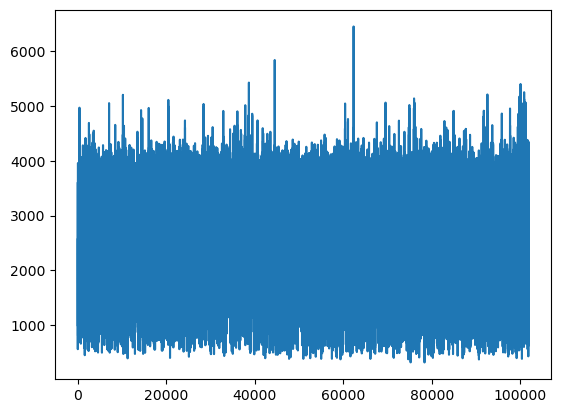

In [167]:
df['spectral_bandwith'].plot()

### Feature selection
- Dimensionality reduction
- Correlated features
- Model training

In [168]:
pop_df = pd.read_csv('../data/Spotify/Data Sources/spotify_tracks.csv', usecols=['popularity', 'id']).rename(columns={'id':'track_id'})

df = df.merge(pop_df, how='left', on='track_id')

Adding track and popularity allows us to correlate features from low_level_audio_features to the popularity of a given track. I used PCA to extrapolate features from the long list of frequencies given, and evaulated the fit for muliple number of components. This yields a low number of components, but does account for the lower levels of correlation inside the range of attributes.

In [169]:
from sklearn.decomposition import PCA

pca_corr = {}
reduced = df.copy()
dimension_to_reduce = {'CHROMA':chroma_col, 'MEL':mel_col, 'MFCC':mfcc_col, 'TON':ton_col, 'SPECT':spec_cont_col}

for i in range(1,6):

    pca = PCA(n_components=i, random_state=42, svd_solver='auto')

    for key in dimension_to_reduce:
        pca_cols = pca.fit_transform(reduced[dimension_to_reduce[key]])
        res_df = pd.DataFrame(pca_cols)
        pca_corr.update({i:(abs(res_df.corrwith(df['popularity'], numeric_only=True))).mean()} )

pca_corr 

{1: 0.15827121518494897,
 2: 0.11973029870434473,
 3: 0.08210634541835048,
 4: 0.08463826572769353,
 5: 0.09176582335649451}

By running PCA with a higher number of components we can see that a subset of the PCA columns do infact have a higher correlation with the popularity of a song.

In [170]:
from sklearn.decomposition import PCA

pca_corr = []
reduced = df.copy()
dimension_to_reduce = {'CHROMA':chroma_col, 'MEL':mel_col, 'MFCC':mfcc_col, 'TON':ton_col, 'SPECT':spec_cont_col}

pca = PCA(n_components=5, random_state=42, svd_solver='auto')

for key in dimension_to_reduce:
    pca_cols = pca.fit_transform(reduced[dimension_to_reduce[key]])
    res_df = pd.DataFrame(pca_cols, columns=[f'PCA_{key}_1', f'PCA_{key}_2', f'PCA_{key}_3', f'PCA_{key}_4', f'PCA_{key}_5'])
    pca_corr.append((abs(res_df.corrwith(df['popularity'], numeric_only=True))))

pca_corr 

[PCA_CHROMA_1    0.049719
 PCA_CHROMA_2    0.003401
 PCA_CHROMA_3    0.039801
 PCA_CHROMA_4    0.024617
 PCA_CHROMA_5    0.018693
 dtype: float64,
 PCA_MEL_1    0.225367
 PCA_MEL_2    0.081049
 PCA_MEL_3    0.100032
 PCA_MEL_4    0.090884
 PCA_MEL_5    0.065147
 dtype: float64,
 PCA_MFCC_1    0.297034
 PCA_MFCC_2    0.099804
 PCA_MFCC_3    0.218009
 PCA_MFCC_4    0.019990
 PCA_MFCC_5    0.002960
 dtype: float64,
 PCA_TON_1    0.029982
 PCA_TON_2    0.024188
 PCA_TON_3    0.024234
 PCA_TON_4    0.005074
 PCA_TON_5    0.054269
 dtype: float64,
 PCA_SPECT_1    0.158271
 PCA_SPECT_2    0.081189
 PCA_SPECT_3    0.006858
 PCA_SPECT_4    0.092234
 PCA_SPECT_5    0.120276
 dtype: float64]

From the correlation we can se that chroma, tonality are not correlated with the popularity of a track, however it could be useful to compress the information of MEL and increasingly MFCC (which are both measuring frequencies) and include in the model. Using PCA we prevent overfitting in the model, while still capturing some of the granularity with feature selection. We are not 100% sure that this is an acceptable way of doing feature selection, but for the sake of this exercise we chose this route.

In [171]:
reduced = df.copy()
reduced.set_index('track_id')

pca = PCA(n_components=5, random_state=42, svd_solver='auto')

mel_pca_col_names = ['MEL_PCA_1', 'MEL_PCA_2', 'MEL_PCA_3','MEL_PCA_4', 'MEL_PCA_5']
mfcc_pca_col_names = ['MFCC_PCA_1', 'MFCC_PCA_2', 'MFCC_PCA_3','MFCC_PCA_4', 'MFCC_PCA_5']
spect_pca_col_names = ['SPECT_PCA_1', 'SPECT_PCA_2', 'SPECT_PCA_3', 'SPECT_PCA_4', 'SPECT_PCA_5']

mel_pca = pd.DataFrame(pca.fit_transform(reduced[mel_col]), columns=mel_pca_col_names, index=reduced['track_id'])
mfcc_pca = pd.DataFrame(pca.fit_transform(reduced[mfcc_col]), columns=mfcc_pca_col_names, index=reduced['track_id'])
spec_pca = pd.DataFrame(pca.fit_transform(reduced[spec_cont_col]), columns=spect_pca_col_names, index=reduced['track_id'])

pca_features = mel_pca.merge(mfcc_pca, left_index=True, right_index=True).merge(spec_pca, left_index=True, right_index=True)

# Dropping features that have been reduced into PCA features
reduced.drop(mel_col, axis=1, inplace=True)
reduced.drop(mfcc_col, axis=1, inplace=True)
reduced.drop(spec_cont_col, axis=1, inplace=True)

# Dropping irrelevant features
reduced.drop(chroma_col, axis=1, inplace=True)
reduced.drop(ton_col, axis=1, inplace=True)

best_features = ['MEL_PCA_1', 'MEL_PCA_3', 'MFCC_PCA_1', 'MFCC_PCA_3', 'SPECT_PCA_1', 'SPECT_PCA_5']
df = reduced.merge(pca_features[best_features], left_on='track_id', right_index=True)

df

ZCR  entropy_energy  spectral_bandwith  spectral_centroid  \
0       0.067966      -89.113389        2564.247669        3558.400706   
1       0.047308     -127.945239        2370.181495        1499.689590   
2       0.058463     -238.285176        2973.294736        1543.550034   
3       0.080547     -148.785733        2716.749483        3017.248824   
4       0.084945     -176.618314        3096.692876        2118.686992   
...          ...             ...                ...                ...   
101904  0.117307      -95.391313        3598.339297        3990.529412   
101905  0.037386     -217.259820        2700.338523        2720.040911   
101906  0.098640     -114.591634        3665.432275        3187.100070   
101907  0.108953     -119.920602        3384.431479        2560.859407   
101908  0.063172     -119.976031        3564.752422        6388.064667   

        spectral_rollOff_max  spectral_rollOff_min                track_id  \
0                4508.506071            367.831109  19YEk4OVQZn3GfoxbpNrU6   
1                3647.394611            230.165275  6zJms3MX11Qu1IKF44LoRW   
2                5623.349330            187.290534  1WugzepXsLjnsM0K4UaWYc   
3                5799.931595            160.940693  1pSlTbCrUJ9rmwj5CNNrX4   
4                6560.018666            229.131948  5yruvWJs3mL00w4slpCVzN   
...                      ...                   ...                     ...   
101904           8276.341621            219.340340  64iZLIYuqRR8rNedN0Yvnh   
101905           3919.184635             99.099401  0qo0ibv3YoVwJ3jKjpB8lQ   
101906           8196.575436            201.765447  1B7tV3WzEnDUS7wXSKDXk3   
101907           7309.889131            234.381916  7DVr6Az7HukAZeK7v3cGZx   
101908           6681.409598            129.040886  6Tgjsd4bD8eb74HOTCr6LC   

        popularity   MEL_PCA_1   MEL_PCA_3  MFCC_PCA_1  MFCC_PCA_3  \
0             10.0 -376.025074  -59.678552  228.040330   43.265306   
1             53.0 -361.131095   30.304820   -5.741766   11.738103   
2             55.0  402.652307  162.486721  -45.170565  -13.418956   
3             19.0   68.136461    4.251868 -121.159202   36.099904   
4             48.0 -227.160254   35.905709  -66.298134   16.088819   
...            ...         ...         ...         ...         ...   
101904        42.0 -198.463627  -42.688892 -109.727895   16.789244   
101905        44.0  455.231876  -20.280229  -20.697325  -16.037458   
101906        45.0 -172.989695   57.404671 -131.874108    6.864623   
101907        38.0 -178.981189  -15.532980 -111.992721   21.046255   
101908        45.0 -245.018009  -29.567699   -1.732513  -22.864768   

        SPECT_PCA_1  SPECT_PCA_5  
0          8.799372    -1.872539  
1          0.064199     1.399029  
2         -3.382184    -0.599245  
3         -2.465980     0.157445  
4         -5.687691     2.020506  
...             ...          ...  
101904   -10.013806     0.667713  
101905    -1.074674     0.966310  
101906    -6.661716     0.550587  
101907    -6.976694     1.342824  
101908    -3.401344     1.797371  

[101909 rows x 14 columns]

We have now reduced the number of columns from 208 to just 14, while still retaining valuable feature information.

In [172]:
correlation_matrix = abs(df.corrwith(df['popularity'], numeric_only=True)).drop('popularity')

correlation_matrix.sort_values(ascending=False)

MFCC_PCA_1              0.297034
entropy_energy          0.262838
MEL_PCA_1               0.225367
MFCC_PCA_3              0.218009
spectral_rollOff_min    0.186538
SPECT_PCA_1             0.158271
SPECT_PCA_5             0.120276
MEL_PCA_3               0.100032
spectral_bandwith       0.099059
spectral_rollOff_max    0.089469
ZCR                     0.014447
spectral_centroid       0.010370
dtype: float64

In [173]:
df.drop('ZCR', axis=1, inplace=True)
df.drop('spectral_centroid', axis=1, inplace=True)

df

entropy_energy  spectral_bandwith  spectral_rollOff_max  \
0           -89.113389        2564.247669           4508.506071   
1          -127.945239        2370.181495           3647.394611   
2          -238.285176        2973.294736           5623.349330   
3          -148.785733        2716.749483           5799.931595   
4          -176.618314        3096.692876           6560.018666   
...                ...                ...                   ...   
101904      -95.391313        3598.339297           8276.341621   
101905     -217.259820        2700.338523           3919.184635   
101906     -114.591634        3665.432275           8196.575436   
101907     -119.920602        3384.431479           7309.889131   
101908     -119.976031        3564.752422           6681.409598   

        spectral_rollOff_min                track_id  popularity   MEL_PCA_1  \
0                 367.831109  19YEk4OVQZn3GfoxbpNrU6        10.0 -376.025074   
1                 230.165275  6zJms3MX11Qu1IKF44LoRW        53.0 -361.131095   
2                 187.290534  1WugzepXsLjnsM0K4UaWYc        55.0  402.652307   
3                 160.940693  1pSlTbCrUJ9rmwj5CNNrX4        19.0   68.136461   
4                 229.131948  5yruvWJs3mL00w4slpCVzN        48.0 -227.160254   
...                      ...                     ...         ...         ...   
101904            219.340340  64iZLIYuqRR8rNedN0Yvnh        42.0 -198.463627   
101905             99.099401  0qo0ibv3YoVwJ3jKjpB8lQ        44.0  455.231876   
101906            201.765447  1B7tV3WzEnDUS7wXSKDXk3        45.0 -172.989695   
101907            234.381916  7DVr6Az7HukAZeK7v3cGZx        38.0 -178.981189   
101908            129.040886  6Tgjsd4bD8eb74HOTCr6LC        45.0 -245.018009   

         MEL_PCA_3  MFCC_PCA_1  MFCC_PCA_3  SPECT_PCA_1  SPECT_PCA_5  
0       -59.678552  228.040330   43.265306     8.799372    -1.872539  
1        30.304820   -5.741766   11.738103     0.064199     1.399029  
2       162.486721  -45.170565  -13.418956    -3.382184    -0.599245  
3         4.251868 -121.159202   36.099904    -2.465980     0.157445  
4        35.905709  -66.298134   16.088819    -5.687691     2.020506  
...            ...         ...         ...          ...          ...  
101904  -42.688892 -109.727895   16.789244   -10.013806     0.667713  
101905  -20.280229  -20.697325  -16.037458    -1.074674     0.966310  
101906   57.404671 -131.874108    6.864623    -6.661716     0.550587  
101907  -15.532980 -111.992721   21.046255    -6.976694     1.342824  
101908  -29.567699   -1.732513  -22.864768    -3.401344     1.797371  

[101909 rows x 12 columns]

We can now train a model on the features of the dataset.

THIS IS NOT CORRECT, and should be changed to a classification task.

In [174]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['popularity', 'track_id'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('F1:', accuracy)

F1: 0.02710725149641841


Scores for this basic model are not exceptional, but is a stepping stone to build a more accurate model. Scoring for this model is based on the floats of the popularity feature, which is very hard to accurately predict. To evaluate a model, buckets should be established for the different levels of popularity, making models more stable and scores higher.

In [175]:
df.to_csv('../data/low_level_audio_encoded.csv')

In [176]:
# Import modules
import numpy as np
import pandas as pd
import xgboost as xgb # Version 1.7 + (Needs categorical encoding)
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

print('XGBoost version:', xgb.__version__)

df = pd.read_csv('../data/low_level_audio_encoded.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

test = df.copy()
value_range = [0, 20, 40, 60, 80, 100]
category_labels = ['very low', 'low', 'medium', 'high', 'very high']

test['popularity'] = pd.cut(test['popularity'], bins=value_range, labels=category_labels)

X = test.drop(["popularity", 'track_id'], axis=1)
y = test["popularity"].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

le = LabelEncoder()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
y_train = le.fit_transform(y_train)

print('Labels:', category_labels, 'encoded to:', np.unique(y_train))

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax', 'enable_categorical':True, 'tree_method':'hist'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                            scoring = 'accuracy', cv = 5, n_jobs = -1) 

optimized_GBM.fit(X_train, y_train)

XGBoost version: 1.7.3
Labels: ['very low', 'low', 'medium', 'high', 'very high'] encoded to: [0 1 2 3 4 5]


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max...None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
             scoring='accuracy')

In [177]:
print('First params:',optimized_GBM.best_params_)

First params: {'max_depth': 3, 'min_child_weight': 1}


In [179]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective':'multi:softmax', 'max_depth': 3, 'min_child_weight': 1,
             'num_class':6, 'tree_method':'hist'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)

optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_class=6, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [180]:
import collections

print('First params:',optimized_GBM.best_params_)

print('X_train shape ', X_train.shape, 'y_train shape:', y_train.shape)

unique, counts = np.unique(y_train, return_counts=True)

print(dict(zip(unique, counts)))

First params: {'learning_rate': 0.1, 'subsample': 0.8}
X_train shape  (81527, 10) y_train shape: (81527,)
{0: 8471, 1: 29576, 2: 32092, 3: 292, 4: 10415, 5: 681}


In [181]:
xgdmat = xgb.DMatrix(X_train, y_train)

In [182]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.7, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax', 'max_depth':3, 'min_child_weight':1,
             'num_class':6, 'tree_method':'hist'} 

cv_xgb = xgb.cv(params = our_params, 
                dtrain = xgdmat, 
                num_boost_round = 3000, 
                nfold = 5,
                metrics = ['merror'],
                maximize=False,
                early_stopping_rounds = 100)

In [183]:
cv_xgb.tail(5)

train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
294           0.510024          0.000451          0.535835         0.002283
295           0.509868          0.000578          0.535982         0.002135
296           0.509917          0.000600          0.535908         0.002332
297           0.509758          0.000653          0.535872         0.002303
298           0.509678          0.000768          0.535724         0.002299

In [187]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.7, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax', 'max_depth':3, 'min_child_weight':1,
             'num_class':6, 'tree_method':'hist'}

clf = xgb.XGBClassifier(our_params)

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [194]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.7, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax', 'max_depth':3, 'min_child_weight':1,
             'num_class':6, 'tree_method':'hist'}  

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 298)

In [195]:
from sklearn.metrics import accuracy_score

le = LabelEncoder()
ss = StandardScaler()
X_test = ss.fit_transform(X_train)
y_test = le.fit_transform(y_train)

testdmat = xgb.DMatrix(X_test)

y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0., 2., 2., ..., 1., 2., 2.], dtype=float32)

In [196]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.48592490831258356, 0.5140750916874164)

Accuraccy, Error rate